In [105]:
import numpy as np
import pandas as pd
import scipy.stats as scst
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import copy

In [217]:
nn = 100000
np.random.seed(123)
x = np.arange(-10, 10, 0.1)
xn = x[:, np.newaxis]
xx = np.tile(xn, nn)
#err = np.random.standard_t(3, size=(x.shape[0], nn))
err = np.random.normal(loc=0.0, scale=1.0, size=(x.shape[0], nn))
yy = xx + err
zz = copy.deepcopy(yy)

lrs = []
for n in range(nn):
    lr = LinearRegression()
    lr.fit(xn, yy[:, n])
    lrs.append(lr)
    zz[:, n] = lr.predict(xn)

In [224]:
np.std(err[100,:])

0.9973854711830992

In [219]:
print(xx.shape)
print(yy.shape)
print(zz.shape)

(200, 100000)
(200, 100000)
(200, 100000)


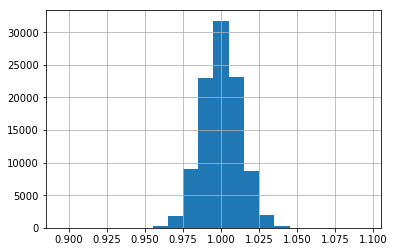

In [220]:
lrcos = []
for lr in lrs:
    lrcos.append(lr.coef_[0])

pd.Series(lrcos).hist(bins=np.arange(0.895, 1.105, 0.01))
plt.show()

In [225]:
m = 100
xm = x[m]
ym = yy[m, :]
zm = zz[m, :]
sr = pd.Series(zm)
srm = sr.mean()
er = np.mean((zm - ym)**2)
bias = (srm - xm)**2
var = ((sr - srm)**2).mean()

print('{:10.8f}'.format(xm))
print('{:10.8f}'.format(srm))
print('{:10.8f}'.format(bias))
print('{:10.8f}'.format(var))
print('{:10.8f}'.format(er))
print('{:10.8f}'.format(er-var-bias))
print('{:10.8f}'.format(np.sqrt(er-var-bias)))
print('{:10.8f}'.format(np.sqrt(er)))

-0.00000000
0.00007927
0.00000001
0.00499726
0.99011695
0.98511969
0.99253196
0.99504620


In [216]:

print('{:10.8f}'.format(np.sqrt(er-var-bias)))

0.98274275


In [208]:
ym.shape

(1000,)

In [195]:
zm.shape

(10000,)

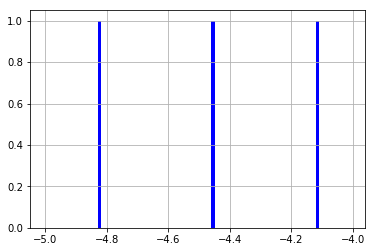

In [196]:
pd.Series(zm).hist(bins=np.arange(-5.0, -4.0, 0.01), color='r')
pd.Series(ym).hist(bins=np.arange(-5.0, -4.0, 0.01), color='b')
plt.show()

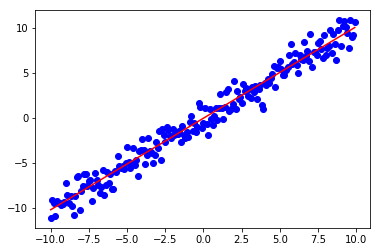

In [226]:
plt.scatter(x, yy[:, 0], c='b')
plt.plot(x, zz[:, 0], 'r')
plt.show()